In [1]:
#importing
import nltk

#Tokenization
nltk.download('punkt') #punkt split words and pinctuation
from nltk.tokenize import word_tokenize

#Stopwords Removal
from nltk.corpus import stopwords
nltk.download('stopwords')

#Remove Punctuations
from string import punctuation

#Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

#POS_token
nltk.download("averaged_perceptron_tagger")

#Named Entity Recognition
import spacy

from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [2]:
#stopwords
english_stopwords = stopwords.words('english')

#Lemmatizing Object
lemmatizer = WordNetLemmatizer()

#load a pretrained language model
model=spacy.load('en_core_web_sm')

In [3]:
#function for Preprocessing and Cleaning Text
def clean_text(document):
  tokens = word_tokenize(document.lower())
  clean_token=[token for token in tokens if token not in english_stopwords]
  clean_token=[token for token in clean_token if token not in punctuation]
  clean_token = [lemmatizer.lemmatize(token,"n") for token in clean_token]
  clean_token = [lemmatizer.lemmatize(token,"v") for token in clean_token]
  clean_token = [lemmatizer.lemmatize(token,"a") for token in clean_token]
  return clean_token

In [9]:
import sys
document=sys.stdin.read()
document=input("Enter Your Text:")


Enter Your Text:Python is a high-level, general-purpose programming language. Its design philosophy emphasizes code readability with the use of significant indentation via the off-side rule.[34]  Python is dynamically typed and garbage-collected. It supports multiple programming paradigms, including structured (particularly procedural), object-oriented and functional programming. It is often described as a "batteries included" language due to its comprehensive standard library.[35][36]  Guido van Rossum began working on Python in the late 1980s as a successor to the ABC programming language and first released it in 1991 as Python 0.9.0.[37] Python 2.0 was released in 2000. Python 3.0, released in 2008, was a major revision not completely backward-compatible with earlier versions. Python 2.7.18, released in 2020, was the last release of Python 2.[38]  Python consistently ranks as one of the most popular programming languages.[39][40][41][42]  History  The designer of Python, Guido van R

In [10]:
#Preprocess and clean the text data
cleaned=clean_text(document)
print(cleaned)

['python', 'high-level', 'general-purpose', 'program', 'language', 'design', 'philosophy', 'emphasize', 'code', 'readability', 'use', 'significant', 'indentation', 'via', 'off-side', 'rule', '34', 'python', 'dynamically', 'type', 'garbage-collected', 'support', 'multiple', 'program', 'paradigm', 'include', 'structure', 'particularly', 'procedural', 'object-oriented', 'functional', 'program', 'often', 'describe', '``', 'battery', 'include', "''", 'language', 'due', 'comprehensive', 'standard', 'library', '35', '36', 'guido', 'van', 'rossum', 'begin', 'work', 'python', 'late', '1980s', 'successor', 'abc', 'program', 'language', 'first', 'release', '1991', 'python', '0.9.0', '37', 'python', '2.0', 'release', '2000.', 'python', '3.0', 'release', '2008', 'major', 'revision', 'completely', 'backward-compatible', 'early', 'version', 'python', '2.7.18', 'release', '2020', 'last', 'release', 'python', '2', '38', 'python', 'consistently', 'rank', 'one', 'popular', 'program', 'language', '39', '4

In [11]:
#Extract named entities
clean1=" ".join(cleaned)
result=model(clean1)
for entity in result.ents:
  print(entity, entity.label_)

34 CARDINAL
35 36 CARDINAL
van rossum PERSON
late 1980s DATE
abc ORG
first ORDINAL
1991 DATE
0.9.0 37 DATE
2.0 release 2000 DATE
3.0 CARDINAL
2008 DATE
2.7.18 CARDINAL
2020 DATE
2 38 DATE
one CARDINAL
39 CARDINAL
41 42 CARDINAL
2006 DATE
late 1980s 43 DATE
guido van rossum PERSON
netherlands GPE
abc ORG
44 CARDINAL
13 CARDINAL
december 1989 DATE
van rossum PERSON
12 july 2018 DATE
46 CARDINAL
january 2019 DATE
five CARDINAL
47 48 CARDINAL
2.0 CARDINAL
16 october 2000 DATE
49 CARDINAL
3.0 CARDINAL
3 CARDINAL
december 2008 DATE
2.6.x 50 DATE
3 CARDINAL
2to3 CARDINAL
2 CARDINAL
3 51 CARDINAL
2.7 CARDINAL
2015 DATE
2020 CARDINAL
3 52 CARDINAL
53 CARDINAL
54 55 CARDINAL
3.7 CARDINAL
2021 DATE
3.9.2 3.8.8 CARDINAL
56 CARDINAL
2.7 CARDINAL
57 CARDINAL
58 CARDINAL
59 2022 DATE
3.10.4 3.9.12 MONEY
60 CARDINAL
61 CARDINAL
2022 DATE
3.9 CARDINAL
series DATE
3.8 3.7 CARDINAL
62 CARDINAL
2022 DATE
four CARDINAL
3.10.7 CARDINAL
3.7.14 CARDINAL
november 2022 DATE
3.11 CARDINAL
3.10 CARDINAL
65 CARDIN

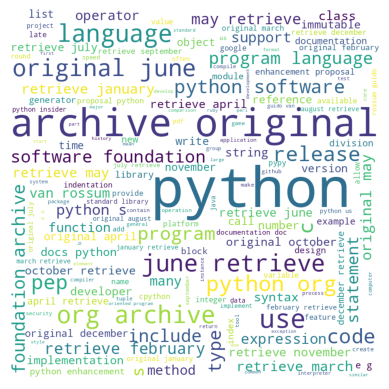

In [12]:
#Visualize text data using wordcloud
wc=WordCloud(width = 800, height= 800, background_color = 'white', min_font_size= 10 )
wc.generate(clean1) #i/p should be in string
plt.imshow(wc)












plt.axis("off")
plt.show()